In [1]:
%matplotlib inline

import pandas as pd


In [2]:
trump_df = pd.read_json('data/trump_ge_speeches.json')

In [3]:
trump_df.head()

,candidate,date,location,text
0,Trump,2016-10-05,HendersonNV,Thank you. It is great to be here in the city ...
1,Trump,2016-10-28,ManchesterNH,Thank you. \nThank you very much. \n\nWe love ...
10,Trump,2016-09-03,Detroit,"Thank you. That's so nice. Thank you.\nWell, t..."
11,Trump,2016-09-09,DC,"Thank you. Thank you very much. Oh, Jon. Jon i..."
12,Trump,2016-10-20,DelawareOH,"Thank you.\nIn 19 days, we are going to win th..."


In [4]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 9
Data columns (total 4 columns):
candidate    64 non-null object
date         64 non-null datetime64[ns]
location     64 non-null object
text         64 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 2.5+ KB


In [5]:
trump_df['text']

0     Thank you. It is great to be here in the city ...
1     Thank you. \nThank you very much. \n\nWe love ...
10    Thank you. That's so nice. Thank you.\nWell, t...
11    Thank you. Thank you very much. Oh, Jon. Jon i...
12    Thank you.\nIn 19 days, we are going to win th...
13    Thank you for the invitation to speak to you t...
14    It's so great to be here tonight. I am honored...
15    Thank you. I always look forward to coming bac...
16    I'd like to take a moment to talk about the he...
17    In 21 days, we are going to win the state of C...
18    It is so great to be back in Florida, my secon...
19    Thank you. It's so great to be in Wisconsin to...
2     Thank you. It is so great to be back in Iowa. ...
20    Thank you.\nI am so happy to be back here in C...
21    Thank you.\nIt's great to be back here in beau...
22    Thanks, Maria, for that introduction, and for ...
23    Thank you, everybody, thank you very much. It'...
24    Thank you. It's wonderful to be here in Pe

In [6]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [7]:
trump_df['speech_length'] = trump_df['text'].apply(word_count)

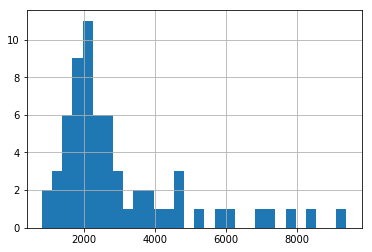

In [8]:
trump_df['speech_length'].hist(bins = 30)

In [9]:
trump_df['speech_length'].describe()

count      64.000000
mean     2979.078125
std      1862.074388
min       809.000000
25%      1817.250000
50%      2303.000000
75%      3617.250000
max      9394.000000
Name: speech_length, dtype: float64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [11]:
seuss_sen = ['This one has a little star.', 
            'This one has a little car.', 
            'Say!',
            'What a lot of fish there are.']

In [12]:
vectorizer = CountVectorizer(lowercase = True,
                             max_df    = 1.0,
                             min_df    = 0.0)

In [13]:
vectorizer.fit(seuss_sen)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
wf_array = vectorizer.transform(seuss_sen)


In [15]:
df= pd.DataFrame(wf_array.todense(),
                 columns = vectorizer.get_feature_names())

df

,are,car,fish,has,little,lot,of,one,say,star,there,this,what
0,0,0,0,1,1,0,0,1,0,1,0,1,0
1,0,1,0,1,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,1,1,0,0,0,1,0,1


In [16]:
vectorizer = CountVectorizer(lowercase = True,
                             stop_words= 'english',
                             max_df    = 1.00,
                             min_df    = 0.00 )

vectorizer.fit(trump_df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
wf_array = vectorizer.transform(trump_df['text'])


In [18]:
df= pd.DataFrame(wf_array.todense(),
                 columns = vectorizer.get_feature_names())

df.sum().sort_values(ascending=False)

going             1713
people            1162
country            995
clinton            953
hillary            942
american           888
jobs               747
america            575
new                531
great              527
know               518
make               495
just               488
don                455
want               445
like               440
said               413
ve                 410
right              402
time               341
world              313
trade              312
states             310
government         307
americans          306
say                302
state              298
president          293
years              292
thank              278
                  ... 
delighted            1
poland               1
plunging             1
deletions            1
heroic               1
pole                 1
terminated           1
deleterious          1
policemen            1
hesitation           1
poisonous            1
demanded             1
memorandum 

In [19]:
import pandas as pd

In [20]:
df = pd.read_json('data/ge_speeches.json')

In [21]:
df.head()

,candidate,date,location,text
0,Trump,2016-10-05,HendersonNV,Thank you. It is great to be here in the city ...
1,Trump,2016-10-28,ManchesterNH,Thank you. \nThank you very much. \n\nWe love ...
10,Trump,2016-08-05,GreenBay,So how good is he? How good is he? \nSpecial. ...
11,Clinton,2016-10-29,DaytonaBeachFL,"Go, Daytona Beach! Wow. Thank you. Thank you s..."
12,Clinton,2016-10-10,Columbus,"It is a glorious night here at the university,..."


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [26]:
 vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,1),
                             stop_words  = 'english',
                             max_df      =  .6, 
                             min_df      = .2,
                             max_features = None)

In [27]:
vectorizer.fit(df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=0.2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [28]:
speech_word_counts = vectorizer.transform(df['text'])

In [29]:
nb_classifier = MultinomialNB()


In [30]:
nb_classifier.fit(speech_word_counts, df['candidate'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
coeficients = pd.Series(nb_classifier.coef_[0], 
                        index = vectorizer.get_feature_names())

In [32]:
coeficients.sort_values()[:20]

hillaryclinton   -10.333710
volunteer        -10.333710
trumps           -10.333710
fairer           -10.333710
divisive          -9.640563
tim               -9.640563
prove             -9.235098
hello             -9.235098
text              -9.235098
excited           -8.947416
vision            -8.724272
grandchildren     -8.724272
ii                -8.724272
com               -8.724272
mayor             -8.541951
advanced          -8.541951
colleges          -8.541951
wage              -8.541951
challenges        -8.541951
began             -8.541951
dtype: float64

In [33]:
coeficients.sort_values(ascending = False)[:20]

percent          -4.757761
illegal          -5.050507
immigration      -5.146325
administration   -5.157561
cities           -5.209746
obamacare        -5.239960
isis             -5.258536
lot              -5.370866
border           -5.399236
deals            -5.413729
mexico           -5.413729
folks            -5.435871
crime            -5.481680
failed           -5.489523
citizens         -5.497428
rebuild          -5.513429
interests        -5.513429
china            -5.513429
nafta            -5.521526
won              -5.521526
dtype: float64

In [34]:
df['prediction']  = nb_classifier.predict(speech_word_counts)

In [35]:
pd.crosstab(df['candidate'], df['prediction'])

prediction,Clinton,Trump
candidate,,
Clinton,34,1
Trump,0,64


In [36]:
predict_df = pd.DataFrame(nb_classifier.predict_proba(speech_word_counts), 
                          columns=nb_classifier.classes_)

In [37]:
combo = pd.concat([df, predict_df], axis = 1)

In [38]:
combo.sort_values('Clinton', ascending=False)[['text','date','Trump', 'Clinton']].head(15)

,text,date,Trump,Clinton
98,"Hello Detroit! Thank you! I'll tell you, I am ...",2016-11-04,1.617133e-180,1.0
58,Thank you. It's wonderful to be back in North ...,2016-09-20,2.967237e-170,1.0
26,I'd like to take a moment to talk about the he...,2016-08-18,7.920819e-111,1.0
28,"In 21 days, we are going to win the state of C...",2016-10-18,7.980572e-142,1.0
32,"Thank you so much! Wow, it is great to be back...",2016-10-31,1.362663e-74,1.0
96,"Thank you. Thank you all. Hello, everyone. It'...",2016-09-15,1.326471e-131,1.0
36,Thank you.\nIt's great to be back here in beau...,2016-10-23,1.887889e-102,1.0
44,"I am going to fight so hard for all of you, an...",2016-09-30,8.469792e-99,1.0
45,It is a privilege to be here this morning with...,2016-10-03,4.657298e-165,1.0
47,Thank you! Thank you all so much. Wow! I am so...,2016-09-29,9.149364e-195,1.0


In [39]:
combo.sort_values('Trump', ascending=False)[['text','date', 'Trump','Clinton' , 'candidate']].head(50)

,text,date,Trump,Clinton,candidate
0,Thank you. It is great to be here in the city ...,2016-10-05,1.0,4.909245e-204,Trump
40,Thank you. It's wonderful to be here in Pennsy...,2016-09-22,1.0,5.036192e-30,Trump
67,"Today, I am here to talk about three crucial w...",2016-09-07,1.0,8.962212e-248,Trump
65,"Hello, B-W-A. I thank you all for that warm we...",2016-09-16,1.0,1.321565e-224,Clinton
64,Hello Grand Valley! Thank you! Thank you.\nIt ...,2016-11-07,1.0,6.372209e-114,Clinton
63,Thank you. I am so thrilled to be back in Wash...,2016-08-30,1.0,0.000000e+00,Trump
60,"Hello, Dade City!\nI am so excited about being...",2016-11-03,1.0,4.351288e-130,Clinton
59,Thank you. It's great to be back in North Caro...,2016-09-06,1.0,6.124511e-118,Trump
56,This is our chance - our one chance - to fix o...,2016-09-12,1.0,6.652584e-180,Trump
55,"This is such an amazing city. It's called ""Hom...",2016-10-03,1.0,4.187481e-132,Trump


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr_classifier = LogisticRegression()

In [ ]:
lr_classifier.fit()